In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')


In [ ]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


Check for missing values

In [ ]:
missing_values = df.isnull().sum()


Changing date format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')


Checking for unique values in each column

In [ ]:
unique_cities = df['City'].unique()
unique_card_types = df['Card Type'].unique()
unique_exp_types = df['Exp Type'].unique()
unique_genders = df['Gender'].unique()

Dict of transformation and checks

In [ ]:
summary = {
    'missing_values': missing_values,
    'unique_cities': unique_cities,
    'unique_card_types': unique_card_types,
    'unique_exp_types': unique_exp_types,
    'unique_genders': unique_genders
}


Stats for the amount column

In [ ]:
amount_stats = df['Amount'].describe()

Count of transactions by gender

In [ ]:
gender_counts = df['Gender'].value_counts()

Count of transactions by Card type

In [ ]:
card_type_counts = df['Card Type'].value_counts()

Count of transactions by 'Exp' Type

In [ ]:
exp_type_counts = df['Exp Type'].value_counts()

Top 10 cities by number of transactions

In [ ]:
city_counts = df['City'].value_counts().head(10)

Compiling results

In [ ]:
descriptive_analysis = {
    'amount_stats': amount_stats,
    'gender_counts': gender_counts,
    'card_type_counts': card_type_counts,
    'exp_type_counts': exp_type_counts,
    'top_10_cities_by_transactions': city_counts
}
print(descriptive_analysis)

{'amount_stats': count     26052.000000
mean     156411.537425
std      103063.254287
min        1005.000000
25%       77120.250000
50%      153106.500000
75%      228050.000000
max      998077.000000
Name: Amount, dtype: float64, 'gender_counts': F    13680
M    12372
Name: Gender, dtype: int64, 'card_type_counts': Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64, 'exp_type_counts': Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64, 'top_10_cities_by_transactions': Bengaluru, India         3552
Greater Mumbai, India    3493
Ahmedabad, India         3491
Delhi, India             3482
Hyderabad, India          784
Chennai, India            774
Kolkata, India            773
Kanpur, India             764
Lucknow, India            759
Jaipur, India             752
Name: City, dtype: int64}


Create a 'YearMonth' column


In [ ]:
df['YearMonth'] = df['Date'].dt.to_period('M')
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,YearMonth
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014-10
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014-08
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014-08
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014-04
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015-05


Calculate total spending per month

In [ ]:
monthly_spending = df.groupby('YearMonth')['Amount'].sum().reset_index()
monthly_spending['YearMonth'] = monthly_spending['YearMonth'].astype(str)
print(monthly_spending)

   YearMonth     Amount
0    2013-10  207360092
1    2013-11  192015963
2    2013-12  214267829
3    2014-01  207650982
4    2014-02  189220180
5    2014-03  203233307
6    2014-04  208284732
7    2014-05  201762312
8    2014-06  191321039
9    2014-07  197981416
10   2014-08  218453126
11   2014-09  209561433
12   2014-10  212485915
13   2014-11  212092005
14   2014-12  202667586
15   2015-01  223558574
16   2015-02  194292444
17   2015-03  206821139
18   2015-04  208110002
19   2015-05  173693297


Plotting

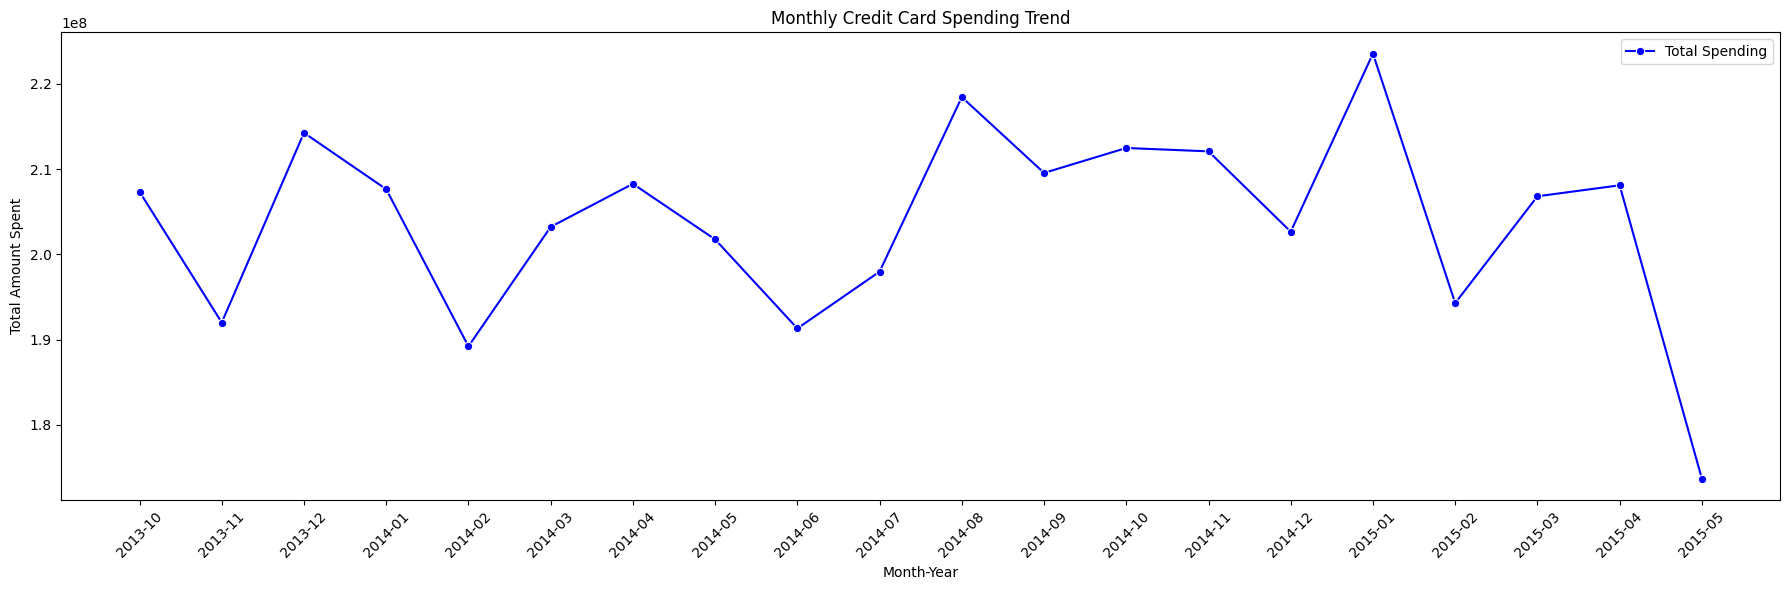

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='YearMonth', y='Amount', data=monthly_spending, marker='o', color='blue', label='Total Spending')
plt.xticks(rotation=45)
plt.title('Monthly Credit Card Spending Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()

Calculate total spending per month by gender



In [ ]:
gender_monthly_spending = df.groupby(['YearMonth', 'Gender'])['Amount'].sum().reset_index()
gender_monthly_spending['YearMonth'] = gender_monthly_spending['YearMonth'].astype(str)
print(gender_monthly_spending)

   YearMonth Gender     Amount
0    2013-10      F  119077274
1    2013-10      M   88282818
2    2013-11      F   99551446
3    2013-11      M   92464517
4    2013-12      F  114793188
5    2013-12      M   99474641
6    2014-01      F  106798371
7    2014-01      M  100852611
8    2014-02      F   98974845
9    2014-02      M   90245335
10   2014-03      F  112995072
11   2014-03      M   90238235
12   2014-04      F  116193790
13   2014-04      M   92090942
14   2014-05      F  114663730
15   2014-05      M   87098582
16   2014-06      F  100563540
17   2014-06      M   90757499
18   2014-07      F  106087028
19   2014-07      M   91894388
20   2014-08      F  114659155
21   2014-08      M  103793971
22   2014-09      F  114636731
23   2014-09      M   94924702
24   2014-10      F  111110961
25   2014-10      M  101374954
26   2014-11      F  117558623
27   2014-11      M   94533382
28   2014-12      F  106020409
29   2014-12      M   96647177
30   2015-01      F  120901797
31   201

Plotting

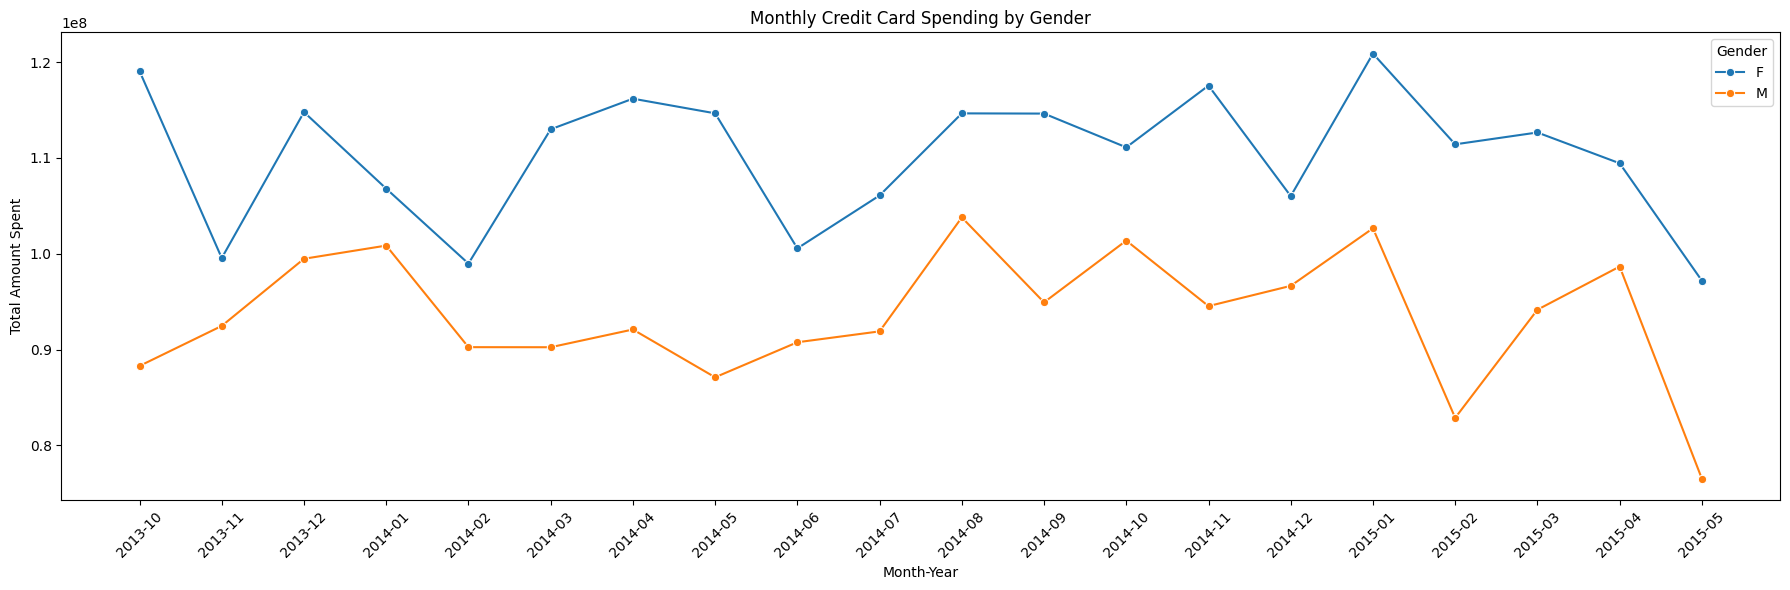

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='YearMonth', y='Amount', hue='Gender', data=gender_monthly_spending, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Credit Card Spending by Gender')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()

CHECKING FOR FRADULENT DATA

Identifying outliers - assuming calculations from previous snippet
Let's visualize the outliers in spending for the first few cities & genders due to potentially large number of combinations

Calculate the 75th percentile and the 25th percentile for each group

In [ ]:
q75, q25 = df.groupby(['City', 'Gender'])['Amount'].quantile([0.75, 0.25]).unstack()



Calculate the Interquartile Range (IQR) for each group

In [ ]:
iqr = q75 - q25



Determine outliers as those beyond 1.5 times the IQR above the 75th percentile

In [ ]:
upper_bound = q75 + 1.5 * iqr



Calculate IQR for each City and Gender

In [ ]:
Q1 = df.groupby(['City', 'Gender'])['Amount'].quantile(0.25)
Q3 = df.groupby(['City', 'Gender'])['Amount'].quantile(0.75)
IQR = Q3 - Q1


Define bounds for outliers

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Applying bounds to the dataset to find outliers

In [ ]:
def is_outlier(row):
    lb = lower_bound.loc[(row['City'], row['Gender'])]
    ub = upper_bound.loc[(row['City'], row['Gender'])]
    return row['Amount'] < lb or row['Amount'] > ub

df['Outlier'] = df.apply(is_outlier, axis=1)


Visualizing Outliers in Spending by City and Gender
Let's visualize for a subset due to potentially large number of combinations

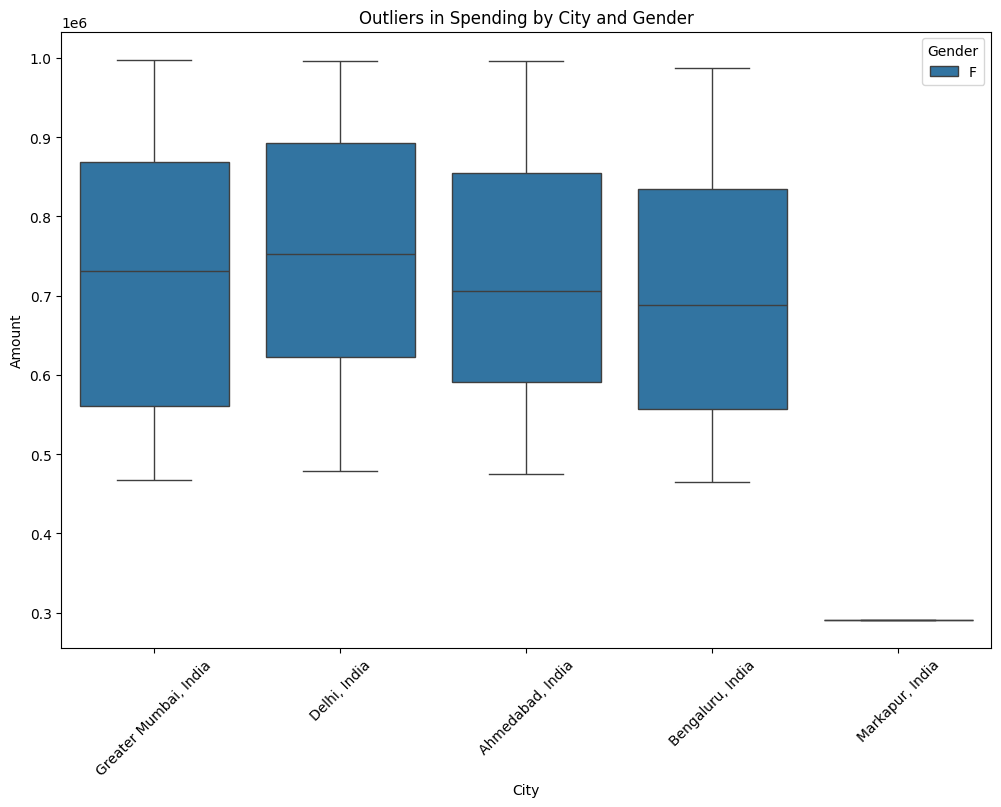

In [ ]:
subset_cities = df['City'].unique()[:5]  # Adjust number as needed
subset = df[df['City'].isin(subset_cities) & df['Outlier']]

plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Amount', hue='Gender', data=subset)
plt.title('Outliers in Spending by City and Gender')
plt.xticks(rotation=45)
plt.show()

Analyzing Sudden Increases in Transaction Frequency by City and Gender with Visualization

Group data by City, Gender, and YearMonth to count transactions



In [ ]:
df_grouped = df.groupby(['City', 'Gender', 'YearMonth'])['Amount'].count().reset_index(name='Transaction_Count')

Calculating month-to-month changes in transaction count

In [ ]:
df_grouped['Previous_Count'] = df_grouped.groupby(['City', 'Gender'])['Transaction_Count'].shift(1)
df_grouped['Change_in_Count'] = df_grouped['Transaction_Count'] - df_grouped['Previous_Count']


Filter for significant changes (customize threshold as needed, here we use a simple example)

In [ ]:
threshold = df_grouped['Change_in_Count'].quantile(0.95)
significant_changes = df_grouped[df_grouped['Change_in_Count'] >= threshold]


Visualizing Sudden Increases in Transaction Frequency

<ipython-input-56-c2bd83a0fae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_changes['YearMonth_str'] = significant_changes['YearMonth'].astype(str)


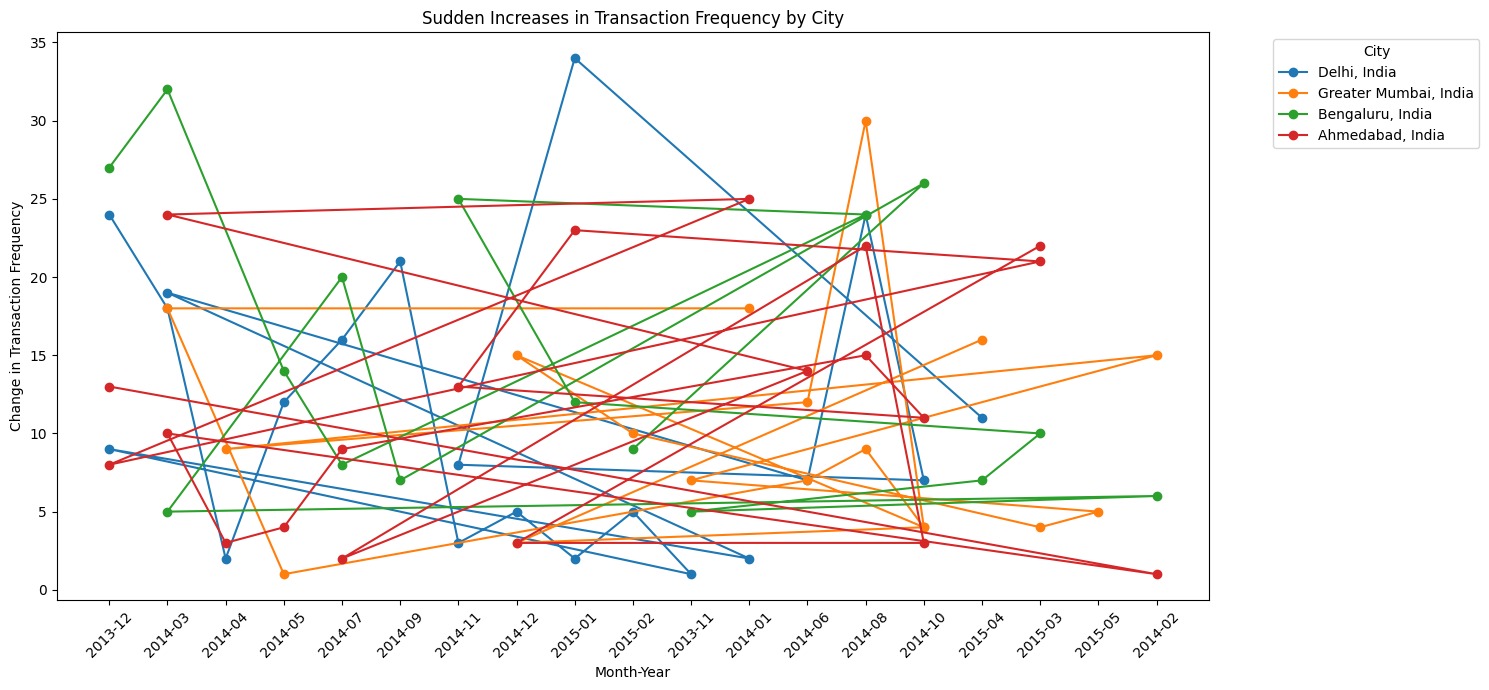

In [ ]:
# Convert 'YearMonth' to string for consistent plotting
significant_changes['YearMonth_str'] = significant_changes['YearMonth'].astype(str)

plt.figure(figsize=(15, 7))

# Plotting changes for each city in subset_cities
for city in subset_cities:
    city_data = significant_changes[significant_changes['City'] == city]
    if not city_data.empty:
        plt.plot(city_data['YearMonth_str'], city_data['Change_in_Count'], marker='o', label=city)

plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Change in Transaction Frequency')
plt.title('Sudden Increases in Transaction Frequency by City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le_city = LabelEncoder()
df['City_Code'] = le_city.fit_transform(df['City'])

le_gender = LabelEncoder()
df['Gender_Code'] = le_gender.fit_transform(df['Gender'])

le_exp_type = LabelEncoder()
df['Exp_Type_Code'] = le_exp_type.fit_transform(df['Exp Type'])

# Features and Target Variable
X = df[['City_Code', 'Gender_Code', 'Card_Type_Code', 'Amount']]  # Assuming 'Card Type' should also be encoded if it's not numeric
y = df['Exp_Type_Code']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df.columns)

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount',
       'YearMonth', 'Outlier', 'City_Code', 'Gender_Code', 'Exp_Type_Code'],
      dtype='object')


In [ ]:
# Assuming df is your DataFrame
le_card_type = LabelEncoder()
df['Card_Type_Code'] = le_card_type.fit_transform(df['Card Type'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Training each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
SVM trained.
KNN trained.
Decision Tree trained.
Random Forest trained.


In [ ]:
from sklearn.metrics import accuracy_score

# Storing model accuracy scores
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.1954
SVM Accuracy: 0.2182
KNN Accuracy: 0.2050
Decision Tree Accuracy: 0.2076
Random Forest Accuracy: 0.2138


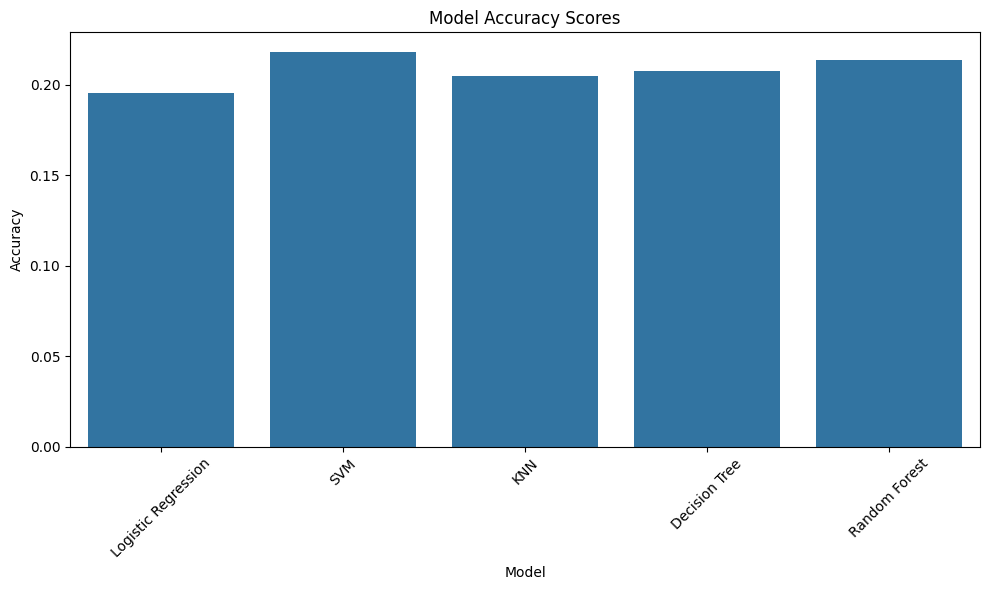

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xticks(rotation=45)
plt.title('Model Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and model
pipeline = make_pipeline(StandardScaler(), GradientBoostingClassifier())

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy with Gradient Boosting: {accuracy:.4f}")

Accuracy with Gradient Boosting: 0.2245


Terrible accuracy. Machine learning not useful.

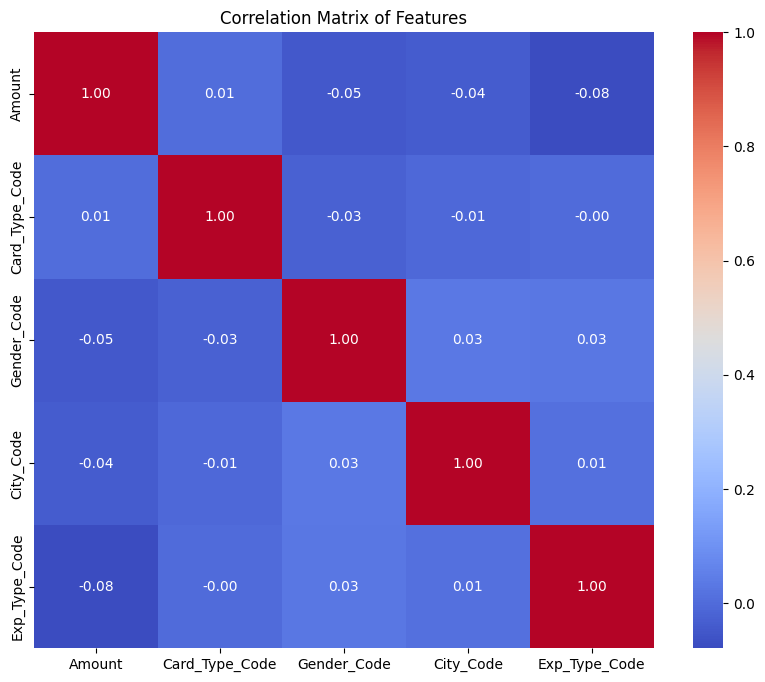

In [ ]:
# Creating a new DataFrame for correlation analysis
df_corr = df[['Amount', 'Card_Type_Code', 'Gender_Code', 'City_Code', 'Exp_Type_Code']]

# Calculating correlation matrix
corr_matrix = df_corr.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

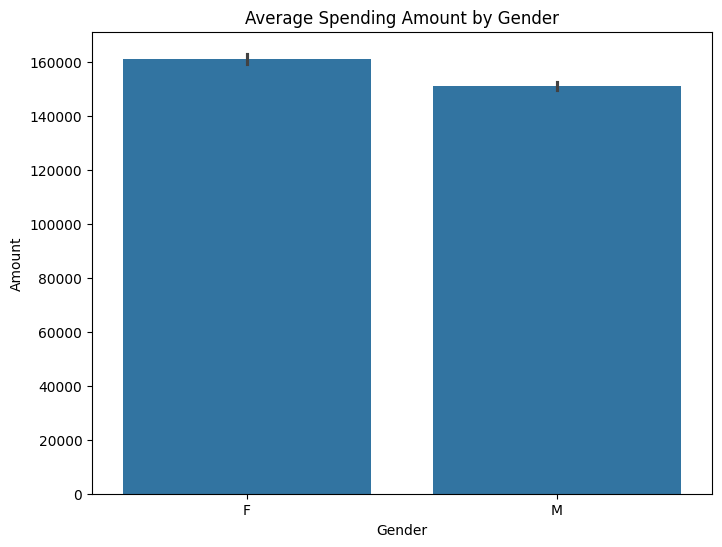

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Amount', data=df)
plt.title('Average Spending Amount by Gender')
plt.show()

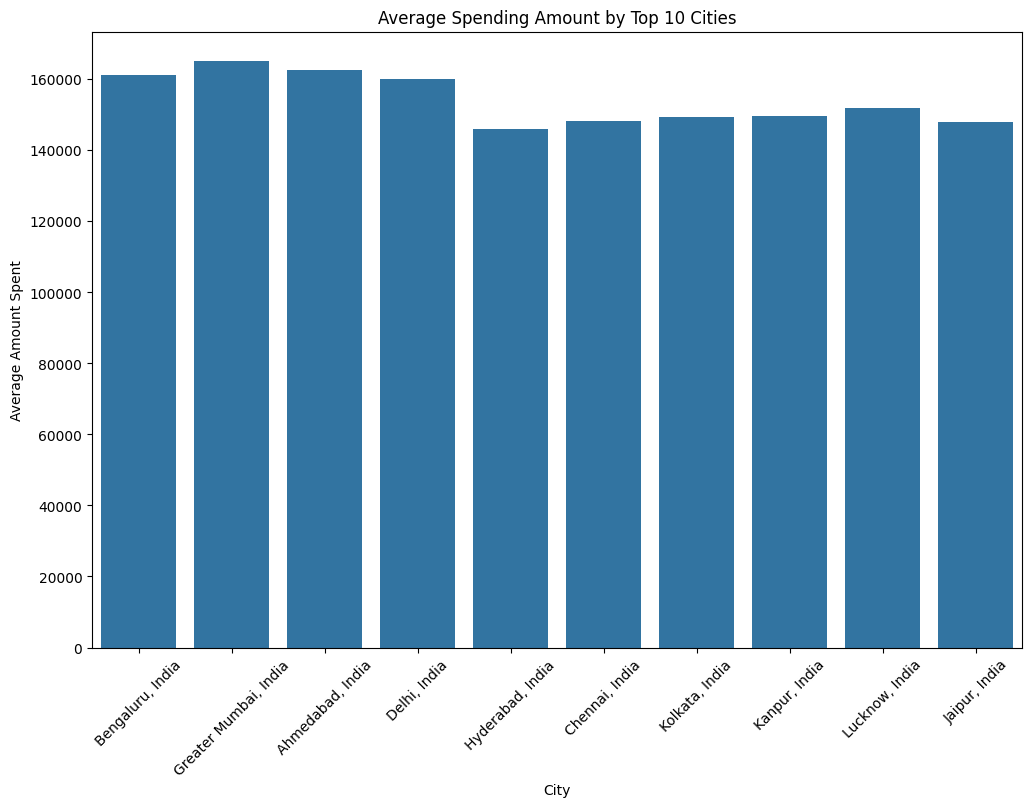

In [ ]:
# Calculating average spending amount by city and sorting by the top 10 cities with the most transactions
top_cities = df.groupby('City')['Amount'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities['mean'])
plt.xticks(rotation=45)
plt.ylabel('Average Amount Spent')
plt.xlabel('City')
plt.title('Average Spending Amount by Top 10 Cities')
plt.show()

In [ ]:
#Assuming 'Date' is in datetime format
#plt.figure(figsize=(14, 7))
#plt.scatter(df['Date'], df['Amount'], alpha=0.5)
#plt.title('Spending Amount Distribution Over Time')
#plt.xlabel('Date')
#plt.ylabel('Amount Spent')
#plt.show()